# Caso de estudio: función Q

El objetivo de este notebook es repasar algunas operaciones con arrays, mostrando también la utilidad de las funciones anónimas. Para ello, trabajaremos sobre el siguiente problema:

Dados unos datos constantes $D = \{d_1, d_2, \ldots d_n\} $ define función

$$ Q(x) = \sum_{k=1}^n (x-d_k)^2 $$

que es la suma de diferencias al cuadrado entre el argumento $x$ y los datos, y calcula el valor de $x$ donde se alcanza el mínimo de $Q$.

### Exploración del problema

En primer lugar importamos los paquetes habituales:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Para hacer gráficas con `plt.plot` definimos un array de valores que recorren el intervalo de interés de la variable.

In [2]:
X = np.linspace(-4,18,100)

Para cada dato concreto el término correspondiente del sumatorio es una parábola:

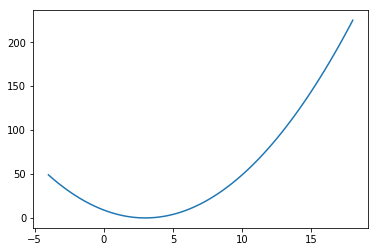

In [3]:
plt.plot(X, (X-3)**2 );

Observa que la expresión `(X-3)**2` es un array, se calculan automáticamente todos los valores correspondientes al vector `X`.

Podemos dibujar varios términos de la suma, que son diferentes parábolas centradas en cada dato:

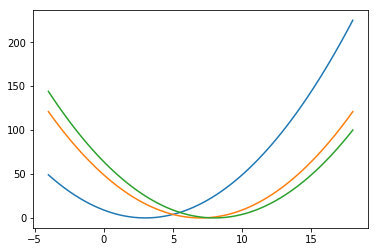

In [4]:
plt.plot(X, (X-3)**2 )
plt.plot(X, (X-7)**2 )
plt.plot(X, (X-8)**2 );

La suma de parábolas es también una parábola:

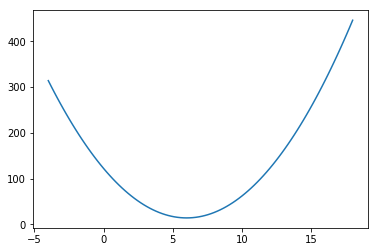

In [5]:
plt.plot(X, (X-3)**2 + (X-7)**2 + (X-8)**2 );

Obtenemos el mismo resultado con un bucle implícito:

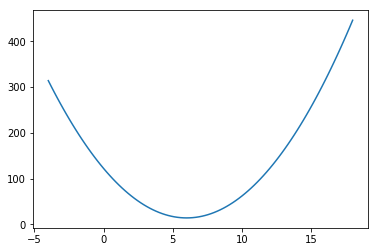

In [6]:
plt.plot(X, sum([ (X-d)**2 for d in [3,7,8]]) );

### Definición de la función 

Lo expresamos mejor en forma de función, guardando inicialmente los datos en una variable global (luego mejoraremos esto).

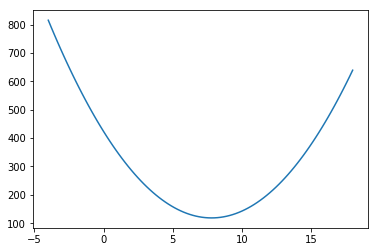

In [7]:
D = [1,3,10,12,13]

def Q(x):
    return sum( [(x-d)**2 for d in D] )

plt.plot( X, Q(X) );

Por definirla de esta manera, la función admite tanto números simples como arrays, evaluando todos los elementos: 

In [8]:
Q(2)

287

In [9]:
Q( np.array( [1,2,3]) )

array([350, 287, 234])

Esto resulta muy práctico para hacer gráficas y operar cómodamente con el conjunto de valores que toma la función en la región de interés.

### Minimización (método aproximado)

La segunda parte del problema consiste en obtener $\DeclareMathOperator*{\argminA}{arg\,min} \argminA_x Q(x)$.

Una primera forma aproximada de hacerlo es aplicar operaciones básicas de arrays a las secuencias de valores `X` y`Q(x)` que hemos usado para dibujar. La posición donde se alcanza el mínimo es:

In [10]:
k = np.argmin( Q(X) )
k

53

El valor de $x$ correspondiente a esa posición es:

In [11]:
X[k]

7.777777777777777

Con lo que quedaría resuelto el problema.

Es inmediato calcular también el valor de la función en el mínimo:

In [12]:
Q( X[k] )

118.80246913580248

O también

In [13]:
Q(X)[k]

118.80246913580248

Las dos expresiones anteriores son equivalentes. Explícalo.

Este método no es muy bueno, ya que solo se tienen en cuenta los elementos discretos del array `X` generado por `np.linspace`. Para encontrar el mínimo con precisión se necesita un muestreo suficientemente denso del dominio, lo que aumenta el tiempo de cómputo y el espacio de almacenamiento. Esto puede llegar a ser prohibitivo en problemas de varias variables.

### Minimización (método preciso)

Es mejor utilizar `minimize`:

In [14]:
from scipy.optimize import minimize

Solo necesitamos un punto de partida para la búsqueda:

In [15]:
sol = minimize(Q, 0)
sol

      fun: 118.80000000000001
 hess_inv: array([[0.1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([7.79999993])

In [16]:
sol['x']

array([7.79999993])

Sabemos que la media de los datos es el valor que produce menor error cuadrático. Por tanto la solución exacta es:

In [17]:
np.mean(D)

7.8

Observa que algoritmo de minimización (una variante del método de Newton) ha realizado solo 12 evaluaciones de la función (`nfev`) y consigue un error relativo menor que $10^{-8}$.

### Observaciones

En la definición anterior de $Q$ hemos usado `sum` de Python "normal", que es equivalente a `np.sum` con `axis=0`. Hemos fabricado una lista de arrays, uno para cada dato:

In [18]:
D = [1,5,7]

x = np.array([1,2,3,4,6,7])

[(x-d)**2 for d in D]

[array([ 0,  1,  4,  9, 25, 36]),
 array([16,  9,  4,  1,  1,  4]),
 array([36, 25, 16,  9,  1,  0])]

Y luego los sumamos elemento a elemento. Si usamos `np.sum` sin indicar `axis` se suma todo y, aunque funciona bien con un $x$ individual, la función no admitirá arrays.

Otra idea sería guardar el conjunto de datos en un array. Si hacemos directamente la resta del argumento con todos los datos la función trabaja bien con escalares:

In [19]:
D = np.array([1,3,10,12,13])

def Q(x):
    return sum( (x-D)**2 )

Q(2)

287

Pero no admitirá arrays: la resta sería de cada elemento de $x$ con cada dato, lo que no tiene ningún sentido. Por tanto, la mejor solución es usar el bucle implícito que hemos visto anteriormente.

### Definición mejorada

En realidad, el conjunto de datos debería ser un segundo argumento de la función:

In [20]:
def Q(x, datos):
    return sum( [(x-d)**2 for d in datos] )

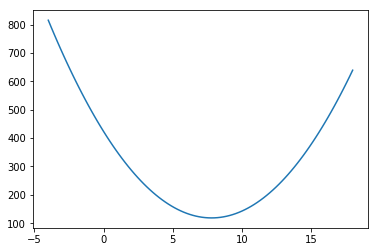

In [21]:
D = [1,3,10,12,13]

plt.plot(X, Q(X, D));

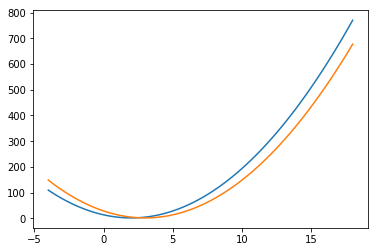

In [22]:
plt.plot(X, Q(X, [1,2,3] ));
plt.plot(X, Q(X, [2,3,4] ));

### Funciones anónimas

La función definida así no es adecuada para `minimize`, que admite una función de un único argumento.

Esto no supone un problema grave, porque podemos crear sobre la marcha una función anónima auxiliar, de un solo argumento, fijando los datos en $Q$:

In [23]:
minimize( lambda x: Q(x, [1,2,3]), 0)

      fun: 2.0
 hess_inv: array([[0.16666667]])
      jac: array([5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])

In [24]:
minimize( lambda x: Q(x, D), 0)

      fun: 118.80000000000001
 hess_inv: array([[0.1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([7.79999993])

### Simplificación

Manipulando la suma de cuadrados como se explicó en clase podemos expresar la función de forma mucho más simple:

In [25]:
def Qm(x, datos):
    mx  = np.mean(datos)
    var = np.var(datos)
    n = len(datos)
    return n*(x-mx)**2  + n*var

In [26]:
Qm( 3, [3,4,5,6])

14.0

In [27]:
Qm( np.array(3) , [123,44,57,60])

22246.0

In [28]:
Qm( np.array([3,8,10]) , [123,44,57,60])

array([22246., 19626., 18634.])

Se puede usar igual que la anterior y es mucho más eficiente, sobre todo si el número de datos es grande.

### Funciones que construyen funciones

Finalmente, si pensamos un poco en el problema, en vez de crear una función que dado un número $x$ y unos datos produce un número, como las anteriores, es más elegante escribir una función que recibe únicamente el conjunto de datos y devuelve otra función que ya solo depende de $x$. En lenguajes como Python y R las funciones pueden producir también como resultado otras funciones:

In [29]:
def mkQ(datos):
    mx  = np.mean(datos)
    var = np.var(datos)
    n = len(datos)
    
    def q(x):
        return n*(x-mx)**2  + n*var
    
    return q

Ahora podemos crear la función Q de cualquier colección de datos:

In [30]:
Q = mkQ( [1,2,7,8] )

In [31]:
R = mkQ( [10,20,30] )

Que se pueden evaluar, ya con un único argumento $x$, donde la media y varianza de los datos se han precalulado al llamar a mkQ (el nombre es un recordatorio de "make Q").

In [32]:
Q(3)

46.0

In [33]:
R(15)

275.0

Y directamente se puede buscar el mínimo:

In [34]:
minimize(Q, 17)

      fun: 37.00000000000089
 hess_inv: array([[0.125]])
      jac: array([4.29153442e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([4.50000047])

In [35]:
minimize(R , 17)

      fun: 200.0000000000014
 hess_inv: array([[0.16666663]])
      jac: array([-3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([19.99999932])

Podríamos también generar la función Q sobre la marcha a partir de los datos. Es una forma alternativa de conseguir el mismo resultado que el ejemplo de la función anónima (lambda) anterior:

In [36]:
minimize( mkQ([1,5,20,14]) , 33)

      fun: 222.00000000000202
 hess_inv: array([[0.12500001]])
      jac: array([-5.7220459e-06])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([9.99999929])